In [10]:
from scipy.io import loadmat
import random
import numpy as np
import matplotlib.pyplot as plt

In [11]:
ocr = loadmat('ocr.mat')
data = ocr['data']
labels = ocr['labels']
testdata = ocr['testdata']
testlabels = ocr['testlabels']

In [69]:
def NNC (X, y, test):
    x_times_x = np.sum(X*X,axis=1)
    xxmatrix = np.array([x_times_x]*test.shape[0])
    txmatrix = np.matmul(test.astype('float'), X.astype('float').T)
    Euclidean = xxmatrix - 2*txmatrix
    arg = np.argmin(Euclidean, axis=1)
    return y[arg]

In [70]:
n = [1000, 2000, 4000, 8000]
for i in n:
    sel = random.sample(range(60000),i)
    data1 = data[sel].astype('float')
    labels1 = labels[sel]
    result1 = NNC(data1,labels1,testdata)
    print("Test error rate for",i,"training sample "
          "is {:.2f}".format((sum(result1!=testlabels)/len(result1))[0]))

Test error rate for 1000 training sample is 0.11
Test error rate for 2000 training sample is 0.09
Test error rate for 4000 training sample is 0.07
Test error rate for 8000 training sample is 0.06


In [39]:
test_error_rate = []
test_error_std = []
for i in n:
    error_rate = []
    for j in range(10):
        sel = random.sample(range(60000),i)
        data1 = data[sel].astype('float')
        labels1 = labels[sel]
        result1 = NNC(data1,labels1,testdata)
        error_rate.append((sum(result1!=testlabels)/len(result1))[0])
    test_error_rate.append(np.mean(error_rate))
    test_error_std.append(np.std(error_rate))

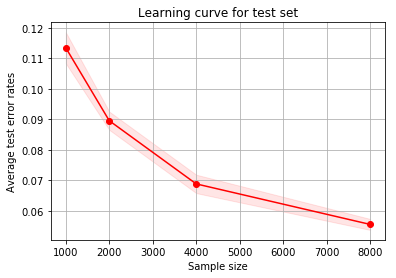

In [66]:
plt.figure()
plt.title("Learning curve for test set")
plt.xlabel("Sample size")
plt.ylabel("Average test error rates")
plt.grid()
plt.fill_between(n,np.array(test_error_rate) - np.array(test_error_std),
                 np.array(test_error_rate) + np.array(test_error_std), alpha=0.1,
                color="r", label="error bar")
plt.plot(n,test_error_rate,'o-', color="r",
         label="Average test error rate")
plt.show()

In [53]:
training_error_rate = []
training_error_std = []
for i in n:
    error_rate = []
    for j in range(10):
        sel = random.sample(range(60000),i)
        data1 = data[sel].astype('float')
        labels1 = labels[sel]
        result1 = NNC(data1,labels1,data1)
        error_rate.append((sum(result1!=labels1)/len(result1))[0])
    training_error_rate.append(np.mean(error_rate))
    training_error_std.append(np.std(error_rate))

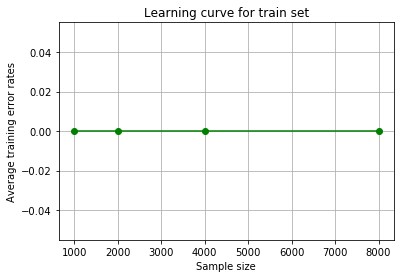

In [67]:
plt.figure()
plt.title("Learning curve for train set")
plt.xlabel("Sample size")
plt.ylabel("Average training error rates")
plt.grid()
plt.fill_between(n,np.array(training_error_rate) - np.array(training_error_std),
                 np.array(training_error_rate) + np.array(training_error_std), alpha=0.1,
                color="g", label="error bar")
plt.plot(n,training_error_rate,'o-', color="g",
         label="Average test error rate")
plt.show()



#### (a)

Basically, the NNC works along with the following steps. 

First, by doing matrix operation, it gets a complete Euclidean distance matrix---Euclidean, the entry [i,j] displays that for each row test data i in the test set, how far is the Euclidean distance between i and the row observation data j in the training set.

Second, by using numpy.argmin, we get a vector arg that contains all the indices of the minimum Euclidean distance along each row. That is the the point positions which are most close/similar to our test data.

Finally, by using these indicies as keys, we look for the value in the training labels and return the corresponding vector as our predicted test labels.

More about matrix operation: for the euclidean matrix, we elimate the t_i^(T) * t_i part, because for each row the amount added would be the same and would not affect the final result. So we just keep the x_j^(T) * x_j - 2 t_i^(T) * x_j in our Euclidean matrix.

#### (b) 
See attached HW1_P1_b

#### (c) 
See attached HW1_P1_c. It would look like a flat line along 0 without any standard error bar. Because according to the nearest neighbour classifier, for any row given, to look for a row in the training set which has the smallest Euclidean distance, the result must be itself, and that would lead to a distance of 0 (100% accuracy) and further to a standard deviation of 0. 